In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url, index_col=0)

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Data Description
The following describes the dataset variables:

| Variable    | Description                                                                                                                                          |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
|CRIM         | per capita crime rate by town
                                     |
|ZN           | proportion of residential land zoned for lots over 25,000 sq.ft.
                                     |
|INDUS        | proportion of non-retail business acres per town.
                                     |
|CHAS         | Charles River dummy variable (1 if tract bounds river; 0 otherwise)
                                     |
|NOX          | nitric oxides concentration (parts per 10 million)
                                     |
|RM           | average number of rooms per dwelling
                                     |
|AGE          | proportion of owner-occupied units built prior to 1940
                                     |
|DIS          | weighted distances to five Boston employment centres
                                     |
|RAD          | index of accessibility to radial highways
                                     |
|TAX          | full-value property-tax rate per USD10,000
                                     |
|PTRATIO      | pupil-teacher ratio by town
                                     |
|LSTAT        |  lower status of the population (%)
                                     |
|MEDV         | Median value of owner-occupied homes in $1000's
                                     |

In [4]:
#check for missing values
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


### Task1: For the "Median value of owner-occupied homes" provide a boxplot

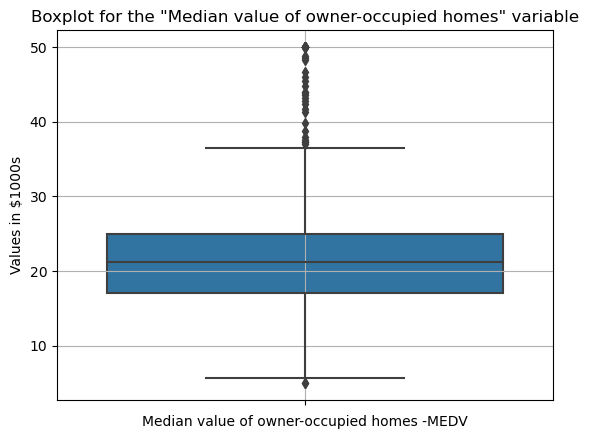

In [5]:
sns.boxplot(y= 'MEDV',data=boston_df, )
plt.title('Boxplot for the "Median value of owner-occupied homes" variable')
plt.grid('True')
plt.xlabel('Median value of owner-occupied homes -MEDV')
plt.ylabel('Values in $1000s');

In [6]:
#To ensure that we understand the values of the boxplot, we have the get the summary statistics for the MEDV column
boston_df.MEDV.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [7]:
#From the above boxplot, it seems that there are lots of outliers in the column; values way higher than the 75% percentile(Q3) and few below the 25th quantile(Q1)

#Get the IQR values for the column
IQR = boston_df.MEDV.quantile(.75) - boston_df.MEDV.quantile(.25) 
lower_bound = boston_df.MEDV.quantile(.25) - IQR 
upper_bound = boston_df.MEDV.quantile(.75) + IQR

#outliers are values below the lower bound and higher and the upper bound
outlier_number =boston_df[boston_df.MEDV> upper_bound].shape[0] + boston_df[boston_df.MEDV<lower_bound].shape[0] 

print(f'Number of low outliers: {boston_df[boston_df.MEDV<lower_bound].shape[0]} \
\nNumber of high outliers: {boston_df[boston_df.MEDV>upper_bound].shape[0]} \
\nThe percentage of outliers ({outlier_number}) in the number of entries ({boston_df.shape[0]}) is {outlier_number/boston_df.shape[0]*100:0.2f}%')

Number of low outliers: 21 
Number of high outliers: 62 
The percentage of outliers (83) in the number of entries (506) is 16.40%


#### Remarks: The number of outliers needs to be examined further to see any relationship with other variables

### Task2: Provide a  bar plot for the Charles river variable

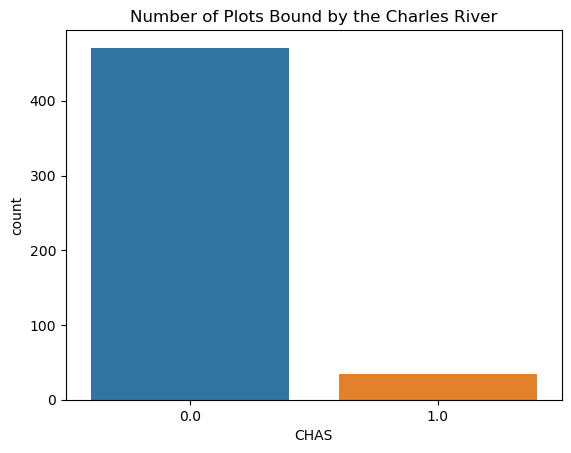

In [8]:
boston_df.CHAS.value_counts().reset_index()
sns.countplot(x="CHAS", data=boston_df)
plt.title('Number of Plots Bound by the Charles River');

##### Count doesn't really tell us much so I'll change the y-axis to percentages. It will be the same proportions but would show a better summary

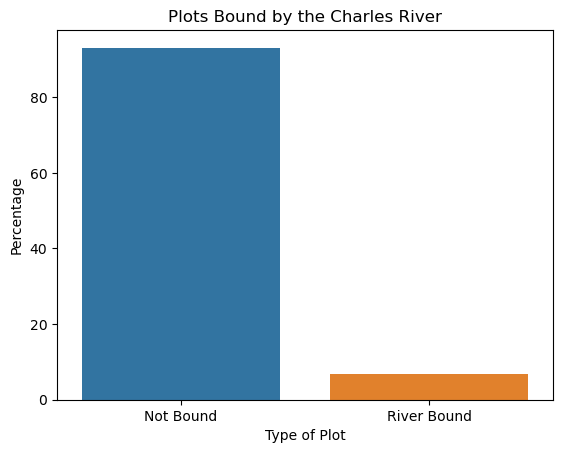

In [9]:
charles_percen =(boston_df.CHAS
                     .value_counts() # For the count of each value in the column
                     .reset_index() #reset the index to turn the series to a dataframe
                     .assign(Percentage= lambda df: round(100*df.CHAS/df.CHAS.sum(), 2)) #create a percentage column and round it up to two decimal places
                     .rename(columns={'index': 'tract_bound'}) #rename the former index to prevent error message with the next operation
                     .assign(tract_bound =lambda df: df.tract_bound.replace({0.0: 'Not Bound', 1.0: 'River Bound'})) # change the values to something readable
                )
                    
sns.barplot(x= 'tract_bound', y='Percentage', data=charles_percen)
plt.title('Plots Bound by the Charles River')
plt.xlabel('Type of Plot');

#### Remarks: The plots bound by the Charles River is lower indicating a larger landmass


### Task3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

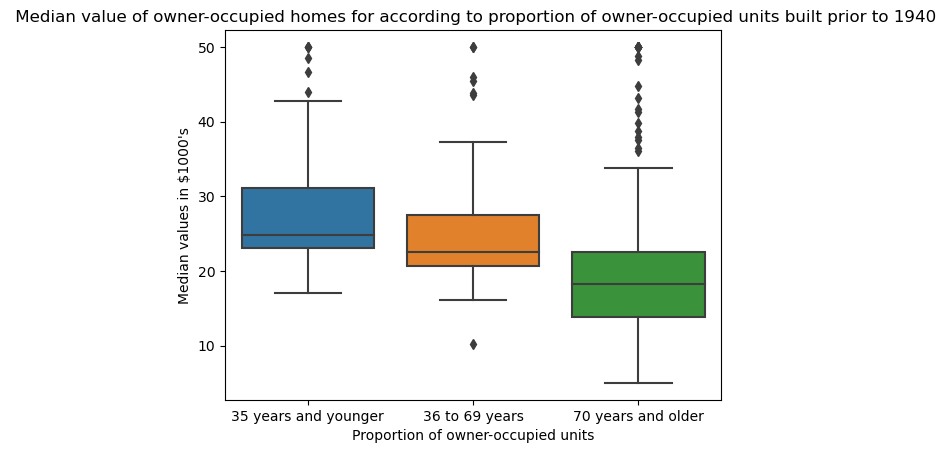

In [10]:
#Create the bins
boston_df.loc[(boston_df.AGE <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df.AGE > 35) & (boston_df.AGE < 70), 'Age_Group'] = '36 to 69 years'
boston_df.loc[(boston_df.AGE >= 70), 'Age_Group'] = '70 years and older'

#sort the Age_Group columns for ordered plotting
age_grp = ['35 years and younger','36 to 69 years', '70 years and older']
boston_df.Age_Group =pd.Categorical(boston_df.Age_Group, ordered=True, categories= age_grp)

#Plot and label
sns.boxplot(x='Age_Group', y='MEDV', data=boston_df)
plt.title(" Median value of owner-occupied homes for according to proportion of owner-occupied units built prior to 1940")
plt.ylabel("Median values in $1000's")
plt.xlabel('Proportion of owner-occupied units');

In [11]:
####Remarks: 
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,36 to 69 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,36 to 69 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,36 to 69 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,36 to 69 years


### Task4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

In [12]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,36 to 69 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,36 to 69 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,36 to 69 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,36 to 69 years


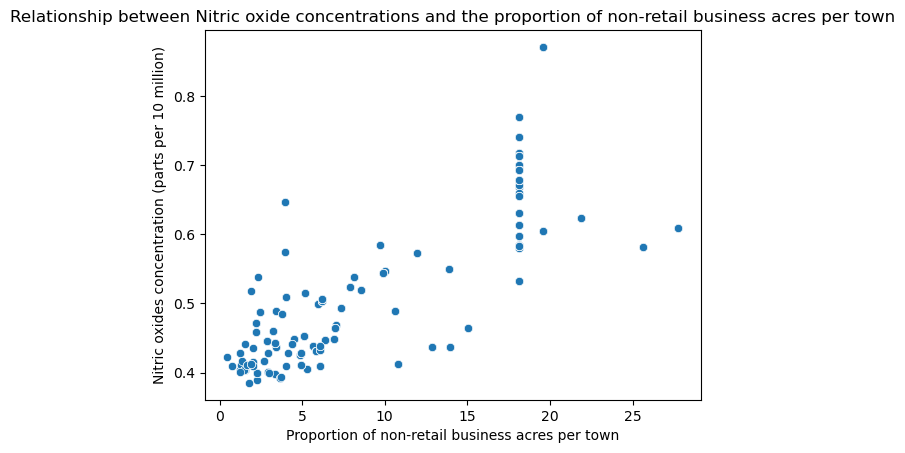

In [13]:
sns.scatterplot(y='NOX', x='INDUS', data=boston_df)
plt.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.xlabel('Proportion of non-retail business acres per town')
plt.ylabel('Nitric oxides concentration (parts per 10 million)');

#### There seems to be positive correlation between the proportion of non-retail business acres and the nitric oxides concentration up till when the proportion is around 19 when any increase beyond this point does not seem to bring  a corresponding increase in Nitrix oxides concentration. This should be investigated further

### Task5: Create a histogram for the pupil to teacher ratio variable

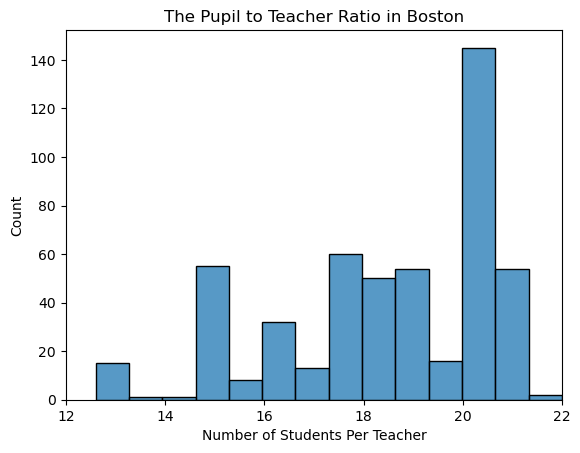

In [14]:
sns.histplot(x='PTRATIO', data=boston_df)
plt.title('The Pupil to Teacher Ratio in Boston')
plt.xlabel('Number of Students Per Teacher')
plt.xlim(12,22);

#### Remarks: The ratio is skewed to the left (negatively skewed). This means that the median is higher than the mean which implies that most of the towns have high student-teacher ratio

### First Test: Is there a significant difference in median value of houses bounded by the Charles river or not? 

Step1: State Hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river and those that are not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river and those that are not")

In [15]:
#Step 2: Check for equality of variance with the Levene Test

levene_test_one = scipy.stats.levene(boston_df[boston_df.CHAS == 1]['MEDV'],
                                     boston_df[boston_df.CHAS ==0]['MEDV'], center='mean'
                                    )
print(round(levene_test_one[-1],5))      

0.00324


In [16]:
#Since the p-value of the levene test is less than 0.05, we can assume equality of variance

#Step 3: Conduct t-test
t_test_charles= scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1]['MEDV'],
                   boston_df[boston_df.CHAS ==0]['MEDV'], equal_var=True)
print(t_test_charles[-1])

7.390623170519905e-05


**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river and those that are not

### Second Test: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940?

Step1: State Hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three group means are equal)
*   $H\_1:$ At least one of the means differs

Step 2: Test for equality of variance

In [17]:
levene_test_two = scipy.stats.levene(boston_df[boston_df.Age_Group =='35 years and younger']['MEDV'],
                                     boston_df[boston_df.Age_Group =='36 to 69 years']['MEDV'],
                                     boston_df[boston_df.Age_Group =='70 years and older']['MEDV']
                                    )
print(round(levene_test_two[-1], 5)) 

0.03181


In [18]:
#Since the p-value of the levene test is less than 0.05, we can assume equality of variance

#Step 3: Conduct ANOVA test
thirty_five = boston_df[boston_df.Age_Group =='35 years and younger']['MEDV']
sixty_nine = boston_df[boston_df.Age_Group =='36 to 69 years']['MEDV']
seventy = boston_df[boston_df.Age_Group =='70 years and older']['MEDV']

anova_medv= scipy.stats.f_oneway(thirty_five, sixty_nine, seventy)
print(anova_medv[-1])

1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis as there is enough evidence that at least one of the means differs.

### Third Test: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Step 1 :State the hypothesis:


*   $H\_0:$ Nitric oxide concentration is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentration is correlated with proportion of non-retail business acres per town

In [19]:
#Step 2: Conduct the Pearson Correlation test

boston_pearson = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(boston_pearson[-1])

7.913361061240043e-98


**Conclusion:** Since the p-value  is  less than 0.05, we reject  the null hypothesis and conclude that there  exists a relationship between nitric oxide concentration and the proportion of non-retail business acres per town

### Fourth Test: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 

Step1: State Hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three group means are equal)
*   $H\_1:$ At least one of the means differs

In [20]:
#Step 2: Conduct the regression analysis
from statsmodels.formula.api import ols
lm = ols('DIS ~ Age_Group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table['PR(>F)'][0])

9.611802545669012e-76


**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis as there is enough evidence that at least one of the means differs.